# UTSA CS 3793/5233: Assignment-4

Summer 2021


**Last Name - First Name - (abc123)**






## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natrual Language Processing - Recurrent Neural Network


## General Information

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import numpy as np
from torchvision.datasets import CIFAR100
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


# Computer Vision - CNN

The goal of this task is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

## Load/Prepare Data

(20 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following: 

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training
*   Visualize the data by plotting 100 random images, one each for the 100 classes



In [ ]:

# Load the data - training as well as testing
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2


transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), 
    transforms.RandomRotation(10), 
    
    
    transforms.ToTensor(),
    
    
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
    ])  


train_data = datasets.CIFAR100('data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR100('data', train=False, download=True, transform=transform)

# Prepare the data that can be used by the next step - creating and training the DL model

#Splitting Training data into 80% and 20%


num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train)) # valid_size = 0.2
train_idx, valid_idx = indices[split:], indices[:split]



#defining samplers for taking tarining and valid data randomly
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

#Preparing DataLoader with original dataset, batch size 20, random sample and running the data in main process ,0 



train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

classes = train_data.classes
# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']




Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


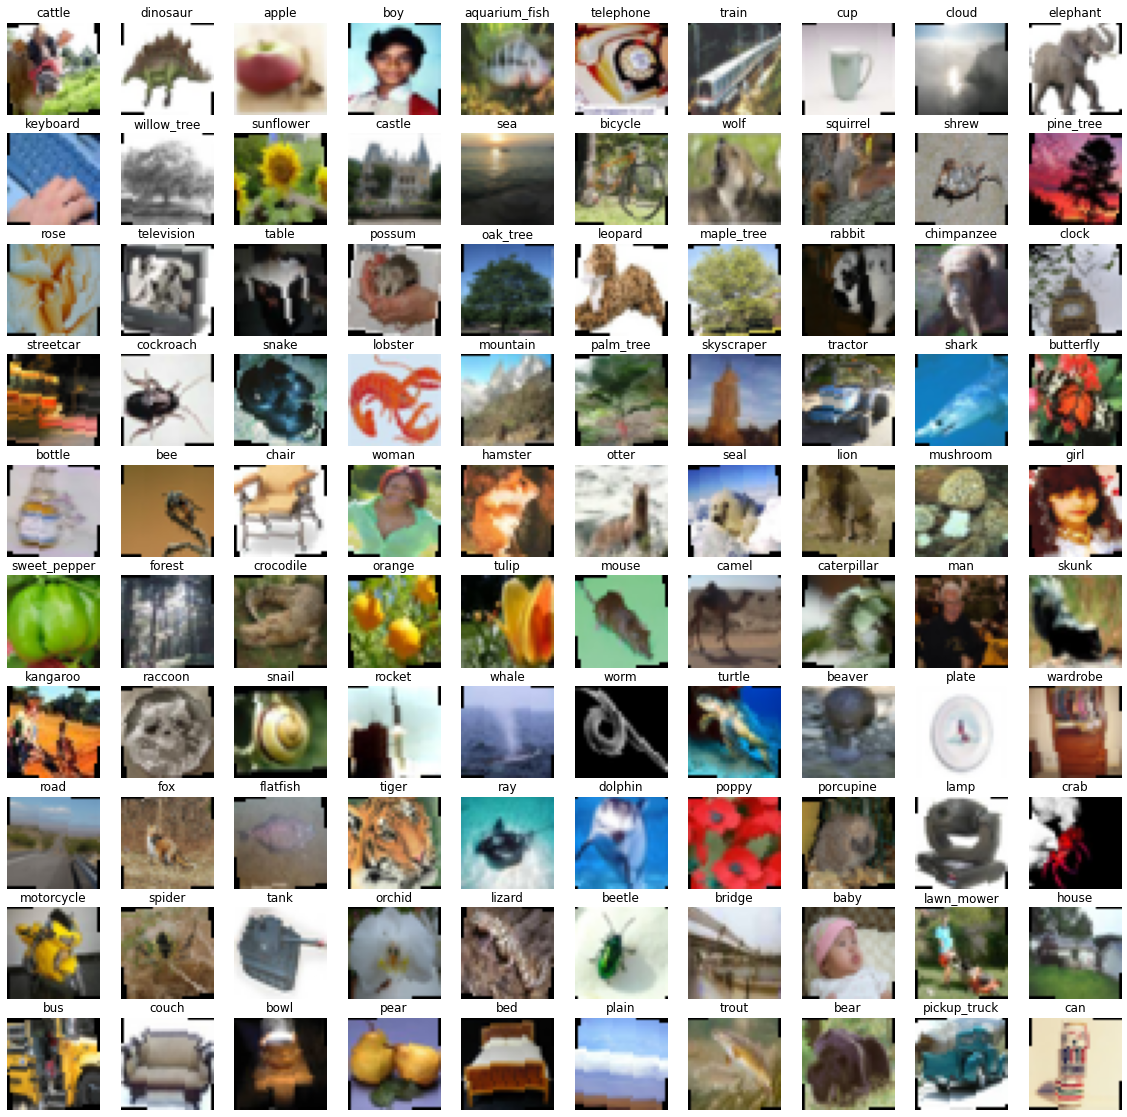

In [ ]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total
# image = train_data[49000]
# tensor,label = image
# print(label)
ar = []
index = 0
fig = plt.figure(figsize=(20,20))
rows = 10
columns = 10
for image in train_data:
    pixel,label = image
    if train_data.classes[label] not in ar:
        index += 1
        ar.append(train_data.classes[label])
        img = np.transpose(pixel, (1, 2, 0))
        img = img/2 + 0.5
        fig.add_subplot(rows, columns, index)
        # showing image
        plt.imshow(img)
        plt.axis('off')
        plt.title(train_data.classes[label])
        #plt.imshow(np.transpose(pixel, (1, 2, 0)))
        #plt.show()
        
##print(count)


## CNN Model Creation

(20 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary

In [ ]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        #convolutional layer (sees 32x32x3 image tensor)
        #uses a kernal of 3X3 to slide over the images with padding 1
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2) 
      
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        self.fc2 = nn.Linear(500, 100)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = self.fc2(x)
        return x

if train_on_gpu:
   model = Net().cuda()
else:
  model = Net()


In [ ]:
# Print the DL model summary

print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=100, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


## Training

(20 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# number of epochs to train the model
n_epochs = 35
loss_ar = []
val_ar = []
valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    train_loss = 0.0
    valid_loss = 0.0
    
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
       
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        
        
        output = model(data)
        
        loss = criterion(output, target)
        loss.backward()
  
        optimizer.step()
      
        train_loss += loss.item()*data.size(0)
        ######################    
    # validate the model #
    ######################
    model.eval()
    for batch_idx, (data, target) in enumerate(valid_loader):

        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
       
        output = model(data)
  
        loss = criterion(output, target)
     
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    loss_ar.append(train_loss)
    val_ar.append(valid_loss)
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    
    
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/cifar/model_augmented.pt')
        valid_loss_min = valid_loss


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 1 	Training Loss: 4.600022 	Validation Loss: 4.575103
Validation loss decreased (inf --> 4.575103).  Saving model ...
Epoch: 2 	Training Loss: 4.403508 	Validation Loss: 4.151041
Validation loss decreased (4.575103 --> 4.151041).  Saving model ...
Epoch: 3 	Training Loss: 3.989273 	Validation Loss: 3.773050
Validation loss decreased (4.151041 --> 3.773050).  Saving model ...
Epoch: 4 	Training Loss: 3.754141 	Validation Loss: 3.592882
Validation loss decreased (3.773050 --> 3.592882).  Saving model ...
Epoch: 5 	Training Loss: 3.577209 	Validation Loss: 3.435058
Validation loss decreased (3.592882 --> 3.435058).  Saving model ...
Epoch: 6 	Training Loss: 3.432879 	Validation Loss: 3.300962
Validation loss decreased (3.435058 --> 3.300962).  Saving model ...
Epoch: 7 	Training Loss: 3.291490 	Validation Loss: 3.190425
Validation loss decreased (3.300962 --> 3.190425).  Saving model ...
Epoch: 8 	Training Loss: 3.182176 	Validation Loss: 3.094194
Validation loss decreased (3.19042

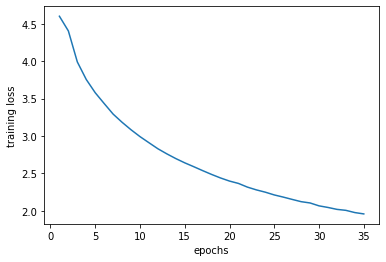

In [ ]:
# Plot the training/validation accuracy and loss
ep = list(range(1,36))
plt.plot(ep,loss_ar)
plt.xlabel("epochs")
plt.ylabel("training loss")
plt.show()

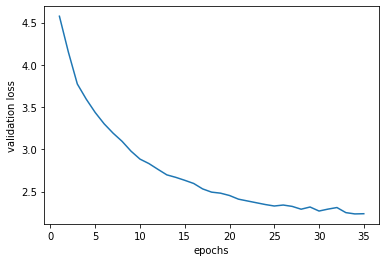

In [ ]:
# Plot the training/validation accuracy and loss
ep = list(range(1,36))
plt.plot(ep,val_ar)
plt.xlabel("epochs")
plt.ylabel("validation loss")
plt.show()

## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model. 

In [ ]:
# Re-initialize the model



In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/cifar/model_augmented.pt'))


<All keys matched successfully>

In [ ]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
# Train/fit the DL model using the training CIFAR-100 data
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))

model.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    
    output = model(data)
    
    loss = criterion(output, target)
    
    test_loss += loss.item()*data.size(0)
    
    _, pred = torch.max(output, 1)    
  
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
        

# average test loss
test_loss = test_loss/len(test_loader.dataset)
#train_loss = train_loss/len(train_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))
#print('Train Loss: {:.6f}\n'.format(train_loss))

for i in range(100):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))




Test Loss: 2.222737

Test Accuracy of apple: 78% (78/100)
Test Accuracy of aquarium_fish: 56% (56/100)
Test Accuracy of  baby: 31% (31/100)
Test Accuracy of  bear: 24% (24/100)
Test Accuracy of beaver: 36% (36/100)
Test Accuracy of   bed: 40% (40/100)
Test Accuracy of   bee: 48% (48/100)
Test Accuracy of beetle: 46% (46/100)
Test Accuracy of bicycle: 44% (44/100)
Test Accuracy of bottle: 48% (48/100)
Test Accuracy of  bowl: 23% (23/100)
Test Accuracy of   boy: 16% (16/100)
Test Accuracy of bridge: 44% (44/100)
Test Accuracy of   bus: 37% (37/100)
Test Accuracy of butterfly: 33% (33/100)
Test Accuracy of camel: 40% (40/100)
Test Accuracy of   can: 39% (39/100)
Test Accuracy of castle: 70% (70/100)
Test Accuracy of caterpillar: 35% (35/100)
Test Accuracy of cattle: 33% (33/100)
Test Accuracy of chair: 75% (75/100)
Test Accuracy of chimpanzee: 72% (72/100)
Test Accuracy of clock: 26% (26/100)
Test Accuracy of cloud: 59% (59/100)
Test Accuracy of cockroach: 61% (61/100)
Test Accuracy of co

## Model Performance - Accuracy (Extra Credit)

(10 points)

For the models submitted, we will look at the accuracy values on the test data. Credit will be allocated based on how the performance is for your model. The submission with the highest accuracy value will get the highest credit and the one with the lowest accuracy value will get the lowest credit.

# Natural Language Processing - RNN

The goal of this task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(20 points)

In this section, you will write code for the following: 

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [ ]:
#import library
# import libraries
import keras
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
from keras.utils import np_utils
from keras.datasets import reuters
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

In [ ]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 64

(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)
# y_test.shape

## RNN Model Creation

(20 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

In [ ]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU

model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(46, activation='softmax'))

In [ ]:
# Print the DL model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense (Dense)                (None, 46)                2990      
Total params: 676,014
Trainable params: 676,014
Non-trainable params: 0
__________________________________________________

## Training

(20 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"
save_model_callback = keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/My Drive/Colab Notebooks/reuters/saved_rnn.ckpt',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


In [ ]:
# Train/fit the DL model using the training Reuters data
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=.3,
                    callbacks=[save_model_callback])



Epoch 1/10
50/50 [==============================] - 85s 2s/step - loss: 0.2559 - acc: 0.9396 - val_loss: 3.2100 - val_acc: 0.4059
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/reuters/saved_rnn.ckpt/assets
Epoch 2/10
50/50 [==============================] - 79s 2s/step - loss: 0.1727 - acc: 0.9632 - val_loss: 3.6655 - val_acc: 0.3273
Epoch 3/10
50/50 [==============================] - 80s 2s/step - loss: 0.1333 - acc: 0.9680 - val_loss: 3.4731 - val_acc: 0.3473
Epoch 4/10
50/50 [==============================] - 79s 2s/step - loss: 0.1166 - acc: 0.9686 - val_loss: 3.5323 - val_acc: 0.3562
Epoch 5/10
50/50 [==============================] - 79s 2s/step - loss: 0.1029 - acc: 0.9718 - val_loss: 3.5159 - val_acc: 0.3748
Epoch 6/10
50/50 [==============================] - 78s 2s/step - loss: 0.0917 - acc: 0.9692 - val_loss: 3.7361 - val_acc: 0.3451
Epoch 7/10
50/50 [==============================] - 78s 2s/step - loss: 0.0829 - acc: 0.9731 - val_loss: 4.0152 - v

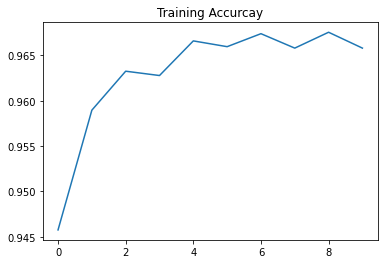

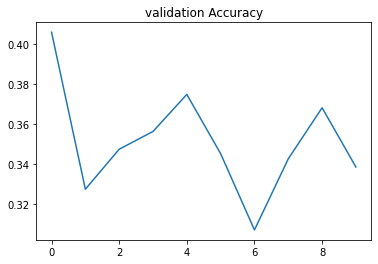

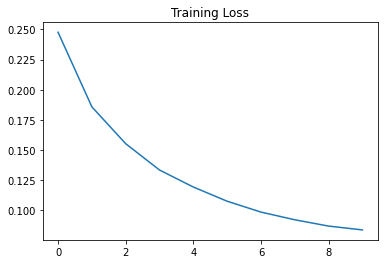

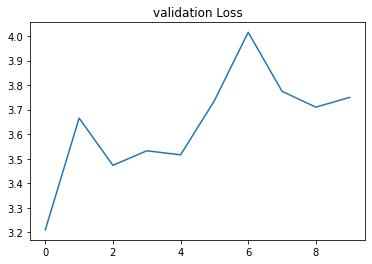

In [ ]:
# Plot the training/validation accuracy and loss
import matplotlib.pyplot as plt 
accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy)
plt.title('Training Accurcay')
plt.show()

plt.plot(epochs, validation_accuracy)
plt.title('validation Accuracy')
plt.show()

plt.plot(epochs, loss)
plt.title('Training Loss')
plt.show()

plt.plot(epochs, validation_loss )
plt.title('validation Loss')
plt.show()

## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e., run this section directly after creating the model.

In [ ]:
# Re-initialize the model
m = model

model.summary()





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense (Dense)                (None, 46)                2990      
Total params: 676,014
Trainable params: 676,014
Non-trainable params: 0
__________________________________________________

In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
model.load_weights('/content/drive/MyDrive/Colab Notebooks/reuters/saved_rnn.ckpt')



In [ ]:
# Evaluate the trained DL model on the Reuters test dataset
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)



71/71 [==============================] - 9s 128ms/step - loss: 3.4131 - acc: 0.3958
Test loss: 3.413104772567749
Test accuracy: 0.39581477642059326


# Submission Instructions



1.   Complete all tasks above.
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folders "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) and "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip) 
4.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   Computer Vision - CNN
    *   (20 points) Load/Prepare Data
    *   (20 points) CNN Model Creation
    *   (20 points) Training
    *   (15 points) Testing/Evaluation
    *   (10 points) EXTRA CREDIT - Model Performance - Accuracy
*   Natural Language Processing - RNN
    *   (20 points) Load/Prepare Data
    *   (20 points) RNN Model Creation
    *   (20 points) Training
    *   (15 points) Testing/Evaluation 

